In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#**Data** **Preprocessing**

In [3]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [5]:
#change the dataset location
df = pd.read_csv('../../Data/bank-additional-full.csv', sep = ';')
df.shape

(41188, 21)

In [6]:
#viewing data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#data info
df.info()
#No null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
#Removing non-relevant variables
df1=df.drop(columns=['day_of_week','month','contact','poutcome','pdays'],axis=1)
df1

,age,job,marital,education,default,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
#Replacing all the binary variables to 0 and 1
df1.y.replace(('yes', 'no'), (1, 0), inplace=True)
df1.default.replace(('yes', 'no'), (1, 0), inplace=True)
df1.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df1.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df1

,age,job,marital,education,default,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,0,0,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [10]:
#creating Dummies for categorical variables
df2 = pd.get_dummies(df1)
df2.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,education_unknown,default_0,default_1,default_unknown,housing_0,housing_1,housing_unknown,loan_0,loan_1,loan_unknown
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,1,0,0,1,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,1,0,0,1,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,1,0,0,1,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,1,0,0,0,1,0


In [11]:
#Removing extra dummy variables & checking descriptive stats
df3=df2.drop(columns=['job_unknown','marital_divorced','education_unknown'],axis=1)
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100
y,41188.0,0.112654,0.316173,0.000,0.000,0.000,0.000,1.000


<AxesSubplot:>

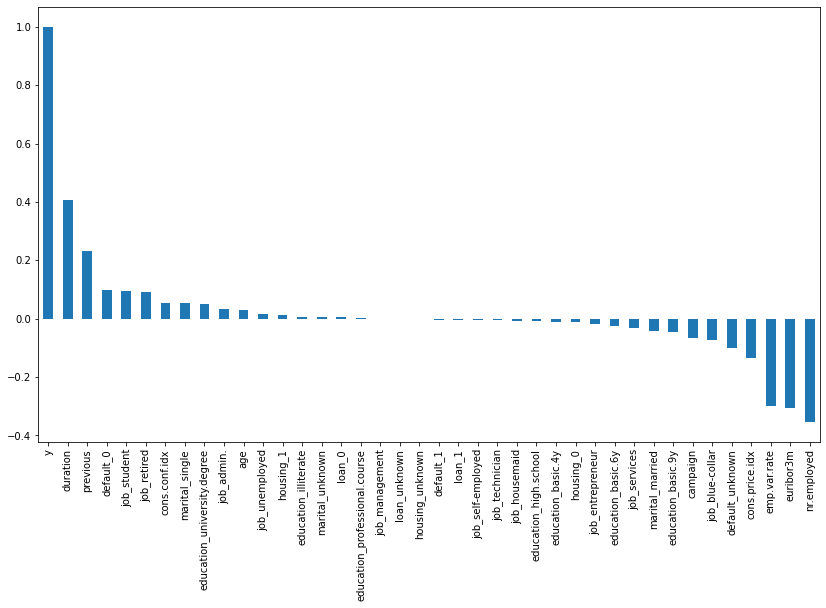

In [12]:
#Correlation plot
plt.figure(figsize=(14,8))
df3.corr()['y'].sort_values(ascending = False).plot(kind='bar')

In [13]:
#Creating binary classification target variable
df_target=df3[['y']].values
df_features=df3.drop(columns=['y'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)

In [14]:
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

#Run SVM


In [ ]:
#Linear SVM
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lsvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

#Predict SVM
y_predl = lsvclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

In [ ]:
#Polynomial SVM
print('Polynomial Model',end='\n')
psvclassifier = SVC(kernel='poly')
psvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = psvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_poly=accuracies.mean()
std_svm_poly=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_poly*100,end='\n')
print('Standard deviation of Accuracies',std_svm_poly*100,end='\n')

#Predict SVM
y_predp = psvclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predp))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predp))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predp, normalize=True, sample_weight=None))

In [ ]:
#RBF SVM
print('RBF Model',end='\n')
rsvclassifier = SVC(kernel='rbf')
rsvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = rsvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_rbf=accuracies.mean()
std_svm_rbf=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_rbf*100,end='\n')
print('Standard deviation of Accuracies',std_svm_rbf*100,end='\n')

#Predict SVM
y_predr = rsvclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predr))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predr))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predr, normalize=True, sample_weight=None))

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(rsvclassifier, 
                                                        df_features, 
                                                        df_target,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


#Decision Trees


In [ ]:
#Entropy Model
eclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
eclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = eclassifier, X = x1_train, y = y1_train, cv = 5)
mean_dt_e=accuracies.mean()
std_dt_e=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_dt_e*100,end='\n')
print('Standard deviation of Accuracies',std_dt_e*100,end='\n')

#predict y
y_pred = eclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test, y_pred))
print('Classification Report:')
print(sk.classification_report(y1_test, y_pred))
print('Accuracy: ',sk.accuracy_score(y1_test,y_pred))

In [ ]:
#Gini Model
gclassifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
gclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = gclassifier, X = x1_train, y = y1_train, cv = 5)
mean_dt_g=accuracies.mean()
std_dt_g=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_dt_g*100,end='\n')
print('Standard deviation of Accuracies',std_dt_g*100,end='\n')

#predict y
y_pred = gclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test, y_pred))
print('Classification Report:')
print(sk.classification_report(y1_test, y_pred))
print('Accuracy: ',sk.accuracy_score(y1_test,y_pred))

In [ ]:
#Pruning the better tree - Entropy Tree
parameters = [{'criterion': ['entropy'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]}] 
grid_search = GridSearchCV(estimator = eclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x1_train, y1_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: ',best_accuracy,end='\n')
print('Best Parameters: ',best_parameters,end='\n')

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(grid_search, 
                                                        df_features, 
                                                        df_target,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


#Boosting

In [ ]:
# Boosting via Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
classifiergb = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifiergb.fit(x1_train, y1_train)

# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifiergb, X = x1_train, y = y1_train, cv = 10,n_jobs=-1)
mean_boosting=accuracies.mean()
std_boosting=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_boosting*100,end='\n')
print('Standard deviation of Accuracies',std_boosting*100,end='\n')

# Predicting the Test set results
y_predgb = classifiergb.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test, y_predgb))
print('Classification Report:')
print(sk.classification_report(y1_test, y_predgb))
print('Accuracy: ',sk.accuracy_score(y1_test,y_predgb))


In [ ]:
#playing around with the pruning to get the best boosting tree
# Applying Grid Search to find the best model and the best parameters
from sklearn.ensemble import AdaBoostClassifier
classifier_AdaBoost = AdaBoostClassifier(random_state=1)
classifier_AdaBoost.fit(x1_train, y1_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50,100,200,300,500,1000,1500]}] 
grid_search = GridSearchCV(estimator = classifier_AdaBoost,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x1_train, y1_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: ',best_accuracy,end='\n')
print('Best Parameters: ',best_parameters,end='\n')

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(classifier_AdaBoost, 
                                                        df_features, 
                                                        df_target,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


## Fairness

In [15]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [16]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [17]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [20]:
df3.loc[df3['age'] < 25, 'age'] = 0
df3.loc[df3['age'] >= 25, 'age'] = 1

In [25]:
df3

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,education_university.degree,default_0,default_1,default_unknown,housing_0,housing_1,housing_unknown,loan_0,loan_1,loan_unknown
0,1,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,1,0,0,1,0,0
2,1,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,1,0,0
3,1,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,1,0,0,1,0,0
4,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,0,1,0,1,0,0
41184,1,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,1,0,0,1,0,0
41185,1,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,1,1,0,0,0,1,0,1,0,0
41186,1,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,1,0,0,1,0,0


In [27]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
dataset_orig = StandardDataset(df3,
                                  label_name='y',
                                  protected_attribute_names=['age'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [28]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.130428


In [29]:
import ipynbname
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.ensemble import GradientBoostingClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 100

model = GradientBoostingClassifier(n_estimators= 1, learning_rate=0.01,random_state=1)

mdl = model.fit(X_train, y_train)
yy = mdl.predict(X_test)

with open('../../Results/GBC/' + nb_fname + '.pkl', 'wb') as f:
    pickle.dump(mdl, f)

with open('../../Results/GBC/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/GBC/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [30]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = GradientBoostingClassifier(n_estimators= i, learning_rate=0.01,random_state=1)
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in dou

In [31]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/GBC/' + nb_fname + '.csv')
final_result

,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99
accuracy,0.894635,0.888161,0.888161,0.888161,0.888161,0.888161,0.888161,0.888161,0.888161,0.888161,...,0.894635,0.894635,0.894635,0.894635,0.894635,0.894635,0.894635,0.894635,0.894635,0.894635
f1,0.132000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.132000,0.132000,0.132000,0.132000,0.132000,0.132000,0.132000,0.132000,0.132000,0.132000
statistical_parity_difference,0.029498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.029498,0.029498,0.029498,0.029498,0.029498,0.029498,0.029498,0.029498,0.029498,0.029498
equal_opportunity_difference,0.075424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.075424,0.075424,0.075424,0.075424,0.075424,0.075424,0.075424,0.075424,0.075424,0.075424
average_abs_odds_difference,0.040721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040721,0.040721,0.040721,0.040721,0.040721,0.040721,0.040721,0.040721,0.040721,0.040721
disparate_impact,1.476121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.476121,1.476121,1.476121,1.476121,1.476121,1.476121,1.476121,1.476121,1.476121,1.476121
theil_index,0.110283,0.118603,0.118603,0.118603,0.118603,0.118603,0.118603,0.118603,0.118603,0.118603,...,0.110283,0.110283,0.110283,0.110283,0.110283,0.110283,0.110283,0.110283,0.110283,0.110283
